# Project Proposal

### Introduction
(introduce the dataset, our question, our research...)

### Preliminary Results
(maybe a bit of lead up before going straight into code)
(i remember getting critique from dsci 100 that we should intersperse markdown explanations along with the code blocks)

In [1]:
library(infer)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [11]:
cl <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE) %>%
    mutate(region = "CL")
hg <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE) %>%
    mutate(region = "HA")
va <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE) %>%
    mutate(region = "VA")
sw <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE) %>%
    mutate(region = "SW")
data <- rbind(cl, hg, va, sw) %>%
    rename(
        age = V1,
        sex = V2,
        chest_pain_type = V3,
        rest_bps = V4,
        chol = V5,
        fbs_over_120 = V6,
        rest_ecg = V7,
        max_heart_rate = V8,
        ex_ang = V9,
        old_peak = V10,
        slope = V11,
        ca = V12,
        thal = V13,
        diagnosis = V14
    )

head(data)

,age,sex,chest_pain_type,rest_bps,chol,fbs_over_120,rest_ecg,max_heart_rate,ex_ang,old_peak,slope,ca,thal,diagnosis,region
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,CL
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,CL
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,CL
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,CL
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,CL
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,CL


In [13]:
data$sex[data$sex == 1] <- "Male"
data$sex[data$sex == 0] <- "Female"

data$chest_pain_type[data$chest_pain_type == 1] <- "Typical Angina"
data$chest_pain_type[data$chest_pain_type == 2] <- "Atypical Angina"
data$chest_pain_type[data$chest_pain_type == 3] <- "Non-Anginal Pain"
data$chest_pain_type[data$chest_pain_type == 4] <- "Asymptomatic"

data$fbs_over_120[data$fbs_over_120 == 0] <- "False"
data$fbs_over_120[data$fbs_over_120 == 1] <- "True"

data$rest_ecg[data$rest_ecg == 0] <- "Normal"
data$rest_ecg[data$rest_ecg == 1] <- "ST-T Wave Abnormality"
data$rest_ecg[data$rest_ecg == 2] <- "Left Ventricular Hypertrophy"

data$ex_ang[data$ex_ang == 0] <- "No"
data$ex_ang[data$ex_ang == 1] <- "Yes"

head(data)

,age,sex,chest_pain_type,rest_bps,chol,fbs_over_120,rest_ecg,max_heart_rate,ex_ang,old_peak,slope,ca,thal,diagnosis,region
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,63,Male,Typical Angina,145,233,True,Left Ventricular Hypertrophy,150,No,2.3,3,0.0,6.0,0,CL
2,67,Male,Asymptomatic,160,286,False,Left Ventricular Hypertrophy,108,Yes,1.5,2,3.0,3.0,2,CL
3,67,Male,Asymptomatic,120,229,False,Left Ventricular Hypertrophy,129,Yes,2.6,2,2.0,7.0,1,CL
4,37,Male,Non-Anginal Pain,130,250,False,Normal,187,No,3.5,3,0.0,3.0,0,CL
5,41,Female,Atypical Angina,130,204,False,Left Ventricular Hypertrophy,172,No,1.4,1,0.0,3.0,0,CL
6,56,Male,Atypical Angina,120,236,False,Normal,178,No,0.8,1,0.0,3.0,0,CL


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 55 rows containing non-finite values (stat_bin).”


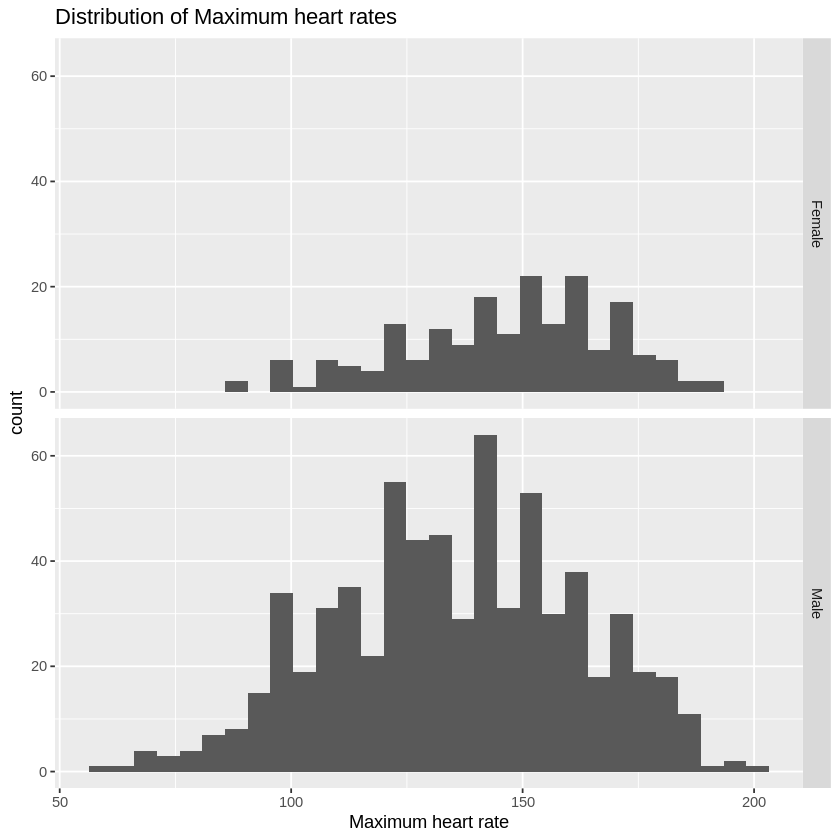

In [13]:
data_updated <- data %>% 
                mutate(max_heart_rate = as.numeric(max_heart_rate)) 


max_heart_rate_plot <- data_updated %>%
                        ggplot() + 
                        geom_histogram(aes(x = max_heart_rate)) +
                        ggtitle("Distribution of Maximum heart rates") +
                        facet_grid(sex ~ .) +
                        xlab("Maximum heart rate")
max_heart_rate_plot


* reading is done
* cleaning is done (at the basic level)
* plotting (not done)
* estimating parameter (not done)

### Methods: Planning
> "Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?
>
> Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.
>
> Finish this section by reflecting on how your final report might play out:
>
> What do you expect to find?
What impact could such findings have?
What future questions could this lead to?"

(quoted directly from the group project page)

### References
(at least two)